In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"C:\Users\Navya\Downloads\congifyz technology\Dataset .csv")
df.shape

(9551, 21)

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [7]:
numeric_feature_columns = ["Longitude", "Latitude", "Average Cost for two", "Price range", "Votes"]
categorical_feature_columns = ["Currency", "Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu", "Rating color", "Rating text"]

feature_columns = numeric_feature_columns + categorical_feature_columns
feature_columns

target_column = 'Aggregate rating'

In [8]:
# X = df[feature_columns]
X1 = pd.get_dummies(data=df[feature_columns], columns=categorical_feature_columns)
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)
y = df[target_column]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6685, 36)
(2866, 36)
(6685,)
(2866,)


In [10]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([3.03618035, 4.6993274 , 3.65631355, ..., 3.66236144, 3.0641599 ,
       3.07120314])

In [12]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred, "Residuals": y_test - y_pred})


comparison_df

,Actual,Predicted,Residuals
8288,3.1,3.036180,0.063820
3601,4.9,4.699327,0.200673
5887,3.5,3.656314,-0.156314
3305,3.4,3.066747,0.333253
218,4.1,4.154285,-0.054285
...,...,...,...
7881,3.2,3.057990,0.142010
7816,0.0,-0.007229,0.007229
8649,3.7,3.662361,0.037639
6970,3.4,3.064160,0.335840


Text(0, 0.5, 'Predictions')

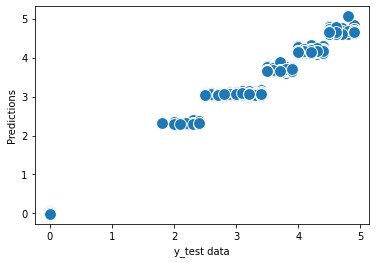

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print('MAE:', mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


MAE: 0.13189331766825435
MSE 0.03279015035423722
RMSE 0.18108050793566163


In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9855699412474695


                                   importance  abs_importance
Rating color_White              -1.475616e+00    1.475616e+00
Rating text_Not rated           -1.475616e+00    1.475616e+00
Rating text_Excellent            8.174160e-01    8.174160e-01
Rating color_Dark Green          8.174160e-01    8.174160e-01
Rating color_Green               5.791486e-01    5.791486e-01
Rating text_Very Good            5.791486e-01    5.791486e-01
Votes                            4.254440e-01    4.254440e-01
Rating text_Good                 3.545870e-01    3.545870e-01
Rating color_Yellow              3.545870e-01    3.545870e-01
Rating text_Poor                -3.245675e-01    3.245675e-01
Rating color_Red                -3.245675e-01    3.245675e-01
Currency_Botswana Pula(P)        8.139223e-02    8.139223e-02
Average Cost for two            -7.179763e-02    7.179763e-02
Currency_Indonesian Rupiah(IDR)  6.356668e-02    6.356668e-02
Latitude                        -5.972708e-02    5.972708e-02
Rating c

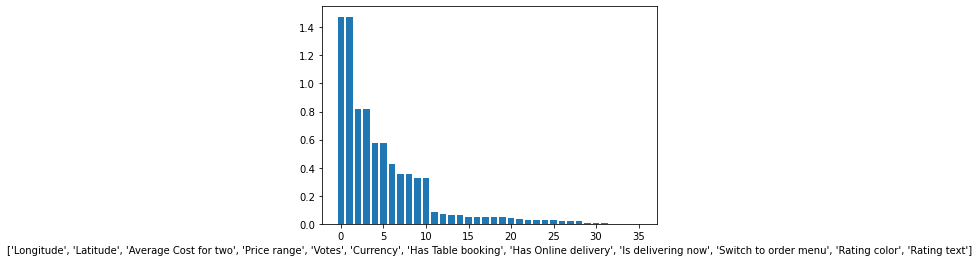

In [16]:
importance = regressor.coef_
# summarize feature importance\
importance_df = pd.DataFrame(data=importance, index=X1.columns, columns=['importance'])
importance_df['abs_importance'] = abs(importance_df['importance'])
importance_df = importance_df.sort_values(by='abs_importance', ascending=False)
print(importance_df)

# plot feature importance
plt.bar([x for x in range(len(importance_df))], importance_df['abs_importance'])
plt.xlabel(feature_columns)
plt.show()